In [1]:
# Prject 3: 
# machine learning models to predict BAC next day price using historical stock data, peer financial stocks (JPM, MS ,C, WFC )
# key macroeconomic variables ( VIX, 10Y Treasury Yield, Dollar Index, Oil Price, Gold Price) 

# perform feature engineering

# Apply different ML algorithms such as decision tree, Random Forest, SVM, K-nearest Neighbors (KNN) nodels

# Evaluate the model based on R- square, rmse, mse, mae and other metrics

In [2]:
import numpy as np
import yfinance as yf
import pandas as pd

In [3]:
#  'BAC' =>> bank of america corporation
#  'JPM' =>> Jp Morgan Chase & Co
#  'MS' =>> Morgan Stanley 
#  'C' =>> Citi Group
#  'WFC' =>> Wells fargo & Co
#  'SPY' =>> s&p500 ETF (Market Index)
#  '^VIX' =>> CBOE Volatility Index (market Fear Index)
#  '^TNX' =>> 10Y US Treasury Index (Interest Rate Indicator)
#  'DX-Y,NYB' =>> US Dollar Index (Strength of US Dollar Index)
#  'CL=F' =>> Crude Oil Future (Inflation/ Energy proxy)
#  'GC=F' =>> Gold Futures (sage asset)

In [4]:
tickers=['BAC','MS','JPM','C','WFC','SPY','^VIX','^TNX','DX-Y.NYB','CL=F','GC=F']
data= yf.download(tickers, start='2002-01-02', end='2025-01-01')['Close']
data

C:\Users\Rohit Kamate\AppData\Local\Temp\ipykernel_28216\1876559796.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download(tickers, start='2002-01-02', end='2025-01-01')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.641193,272.726288,21.010000,115.790001,278.899994,18.408516,27.593229,74.703072,11.182109,5.157,22.709999
2002-01-03,17.621582,272.940186,20.370001,116.110001,278.200012,18.899748,28.392750,75.550125,11.223296,5.120,21.340000
2002-01-04,17.896166,278.019470,21.620001,116.330002,278.899994,19.750542,29.801872,76.054504,11.251615,5.141,20.450001
2002-01-07,17.683216,274.758148,21.480000,116.330002,278.600006,19.699894,29.577023,75.517845,11.269631,5.057,21.940001
2002-01-08,17.400219,264.652924,21.250000,116.830002,278.899994,19.547970,28.957409,75.343239,11.225876,5.057,21.830000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,43.600803,69.083389,70.099998,108.260002,2620.000000,237.286896,123.599083,596.076904,70.067413,4.591,14.270000
2024-12-26,43.767818,69.423943,69.620003,108.129997,2638.800049,238.099686,124.542664,596.116699,70.233810,4.579,14.730000
2024-12-27,43.561504,69.083389,70.599998,108.000000,2617.199951,236.170517,123.307259,589.841614,69.597633,4.619,15.950000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5810 entries, 2002-01-02 to 2024-12-31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BAC       5789 non-null   float64
 1   C         5789 non-null   float64
 2   CL=F      5779 non-null   float64
 3   DX-Y.NYB  5807 non-null   float64
 4   GC=F      5775 non-null   float64
 5   JPM       5789 non-null   float64
 6   MS        5789 non-null   float64
 7   SPY       5789 non-null   float64
 8   WFC       5789 non-null   float64
 9   ^TNX      5783 non-null   float64
 10  ^VIX      5789 non-null   float64
dtypes: float64(11)
memory usage: 544.7 KB


In [6]:
data.describe()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
count,5789.000000,5789.000000,5779.000000,5807.000000,5775.000000,5789.000000,5789.000000,5789.000000,5789.000000,5783.000000,5789.000000
mean,21.845039,108.706596,66.811741,90.834782,1212.050857,60.128536,37.036111,188.713281,29.228941,3.079020,19.471192
std,9.928677,109.153038,24.071656,10.092435,555.276716,48.947083,23.527699,132.976985,12.865738,1.158701,8.613284
min,2.442876,7.568430,-37.630001,71.330002,278.100006,8.126893,6.377223,50.092171,5.326456,0.499000,9.140000
25%,12.591781,36.205482,48.520000,81.879997,732.649994,24.776033,21.307302,86.553772,18.006210,2.130000,13.610000
50%,22.604195,50.127052,66.230003,90.779999,1253.000000,37.517151,28.930740,133.053696,24.123175,2.979000,17.100000
75%,29.215794,194.672806,84.514999,97.825001,1648.750000,89.117096,41.938251,256.664001,40.542667,4.099500,22.530001
max,46.671665,378.467773,145.289993,120.239998,2788.500000,245.101456,131.313080,600.509277,75.704918,5.428000,82.690002


In [7]:
data.isnull().sum()

Ticker
BAC         21
C           21
CL=F        31
DX-Y.NYB     3
GC=F        35
JPM         21
MS          21
SPY         21
WFC         21
^TNX        27
^VIX        21
dtype: int64

In [8]:
# we can do with missing data
# 1) Drop the values
# 2) Forward Fill 
# 3) Backward Fill
# 4) Avg of the perticular stock
# 5) Interpolation 

In [9]:
# Appplying forward fill on my dataset
data= data.ffill()
data.head()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Date,,,,,,,,,,,
2002-01-02,17.641193,272.726288,21.010000,115.790001,278.899994,18.408516,27.593229,74.703072,11.182109,5.157,22.709999
2002-01-03,17.621582,272.940186,20.370001,116.110001,278.200012,18.899748,28.392750,75.550125,11.223296,5.120,21.340000
2002-01-04,17.896166,278.019470,21.620001,116.330002,278.899994,19.750542,29.801872,76.054504,11.251615,5.141,20.450001
2002-01-07,17.683216,274.758148,21.480000,116.330002,278.600006,19.699894,29.577023,75.517845,11.269631,5.057,21.940001
2002-01-08,17.400219,264.652924,21.250000,116.830002,278.899994,19.547970,28.957409,75.343239,11.225876,5.057,21.830000


In [10]:
data.isnull().sum()

Ticker
BAC         0
C           0
CL=F        0
DX-Y.NYB    0
GC=F        0
JPM         0
MS          0
SPY         0
WFC         0
^TNX        0
^VIX        0
dtype: int64

In [11]:
data.corr()

Ticker,BAC,C,CL=F,DX-Y.NYB,GC=F,JPM,MS,SPY,WFC,^TNX,^VIX
Ticker,,,,,,,,,,,
BAC,1.000000,0.461779,-0.070637,0.360871,0.071502,0.569557,0.786216,0.544844,0.342323,0.381009,-0.214983
C,0.461779,1.000000,-0.328865,-0.056293,-0.753355,-0.404546,-0.078854,-0.429433,-0.509659,0.716295,-0.165584
CL=F,-0.070637,-0.328865,1.000000,-0.513374,0.436498,0.117551,0.110137,0.140270,0.149889,-0.045080,-0.111997
DX-Y.NYB,0.360871,-0.056293,-0.513374,1.000000,0.165210,0.527508,0.509171,0.542913,0.449883,0.055238,0.003703
GC=F,0.071502,-0.753355,0.436498,0.165210,1.000000,0.787185,0.581200,0.810607,0.694652,-0.526051,-0.022830
JPM,0.569557,-0.404546,0.117551,0.527508,0.787185,1.000000,0.902370,0.987253,0.834764,-0.196493,-0.136455
MS,0.786216,-0.078854,0.110137,0.509171,0.581200,0.902370,1.000000,0.901737,0.660625,0.098139,-0.153446
SPY,0.544844,-0.429433,0.140270,0.542913,0.810607,0.987253,0.901737,1.000000,0.824806,-0.243903,-0.126401
WFC,0.342323,-0.509659,0.149889,0.449883,0.694652,0.834764,0.660625,0.824806,1.000000,-0.322967,-0.333026


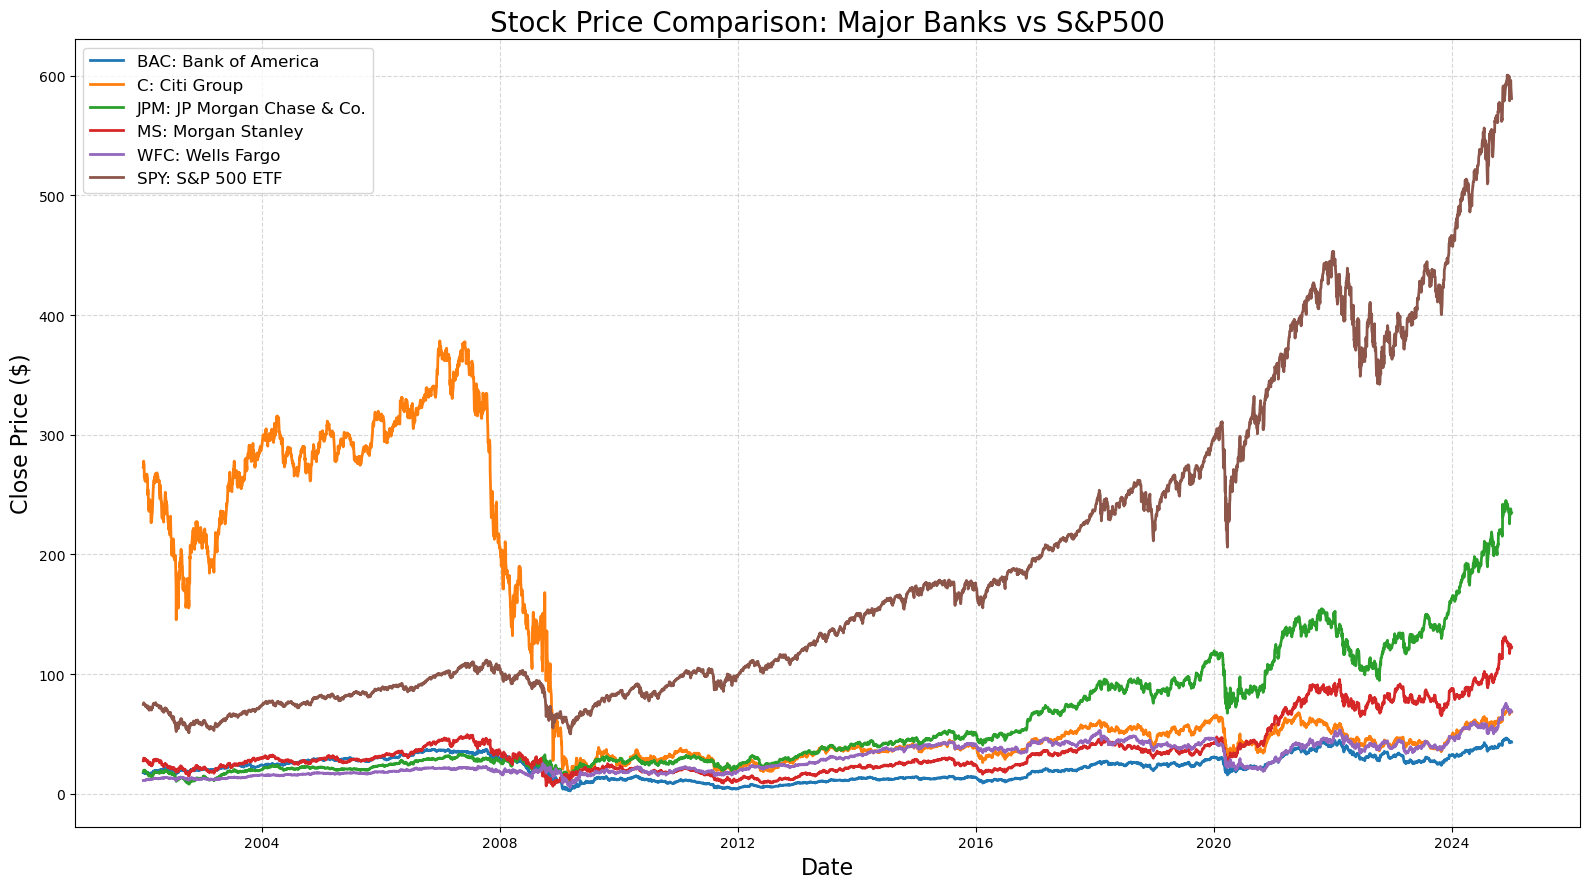

In [12]:
import matplotlib.pyplot as plt

# Create a larger picture
plt.figure(figsize=(16,9))

# Plot each stock
plt.plot(data.index, data['BAC'], label='BAC: Bank of America', linewidth= 2)
plt.plot(data.index, data['C'], label='C: Citi Group', linewidth= 2)
plt.plot(data.index, data['JPM'], label='JPM: JP Morgan Chase & Co.', linewidth= 2)
plt.plot(data.index, data['MS'], label='MS: Morgan Stanley', linewidth= 2)
plt.plot(data.index, data['WFC'], label='WFC: Wells Fargo', linewidth= 2)
plt.plot(data.index, data['SPY'], label='SPY: S&P 500 ETF', linewidth= 2)

# Title, label for X & Y Axis
plt.title('Stock Price Comparison: Major Banks vs S&P500',fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price ($)',fontsize=16)

# Add grid lines for readability
plt.grid(True, linestyle='--', alpha=00.5)

# Customize legend
plt.legend(fontsize = 12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
data.columns

Index(['BAC', 'C', 'CL=F', 'DX-Y.NYB', 'GC=F', 'JPM', 'MS', 'SPY', 'WFC',
       '^TNX', '^VIX'],
      dtype='object', name='Ticker')

In [14]:
#  Feature engineering 
df=pd.DataFrame(index= data.index)
#  create lag features
df['JPM(t-1)']= data['JPM'].shift(1)
df['BAC(t-1)']= data['BAC'].shift(1)
df['MS(t-1)']= data['MS'].shift(1)
df['C(t-1)']= data['C'].shift(1)
df['WFC(t-1)']= data['WFC'].shift(1)
df['SPY(t-1)']= data['SPY'].shift(1)

# Create lag features - Macroeconomic Data
df['VIX(t-1)']= data['^VIX'].shift(1)
df['^TNX(t-1)']= data['^TNX'].shift(1)
df['GC=F(t-1)']= data['GC=F'].shift(1)
df['DX-Y.NYB(t-1)']= data['DX-Y.NYB'].shift(1)
df['CL=F(t-1)']= data['CL=F'].shift(1)

#  Technical Indictors = Moving Average and Rolling Volatility
df['BAC_MA5'] = data['BAC'].rolling(window=5).mean().shift(1)
df['BAC_MA10'] = data['BAC'].rolling(window=10).mean().shift(1)
df['BAC_MA10'] = data['BAC'].rolling(window=10).mean().shift(1)
df['BAC_Volatility5']= data['BAC'].pct_change(5).shift(1)

# Create Target Variable 
df['Target']=data['BAC']
df=df.dropna()
df

,JPM(t-1),BAC(t-1),MS(t-1),C(t-1),WFC(t-1),SPY(t-1),VIX(t-1),^TNX(t-1),GC=F(t-1),DX-Y.NYB(t-1),CL=F(t-1),BAC_MA5,BAC_MA10,BAC_Volatility5,Target
Date,,,,,,,,,,,,,,,
2002-01-16,19.178274,17.218103,29.022621,265.829376,11.666053,74.457382,22.700001,4.831,284.399994,117.290001,18.900000,17.205208,17.426842,-0.010466,17.035969
2002-01-17,18.489542,17.035969,28.029297,261.231293,11.673778,72.950752,23.450001,4.839,287.299988,117.589996,18.860001,17.140763,17.366319,-0.018563,17.125633
2002-01-18,18.661722,17.125633,28.917267,266.791565,11.740698,73.500389,22.250000,4.933,284.399994,117.849998,18.040001,17.091448,17.316724,-0.014194,17.035969
2002-01-21,18.185684,17.035969,28.405544,267.112366,11.681498,73.164177,22.520000,4.888,283.100006,117.510002,18.000000,17.085844,17.230704,-0.001642,17.035969
2002-01-22,18.185684,17.035969,28.405544,267.112366,11.681498,73.164177,22.520000,4.888,283.100006,117.660004,18.000000,17.090329,17.165980,0.001318,17.559935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,233.448151,43.119408,121.060173,67.886589,69.039757,589.524353,16.780001,4.599,2612.300049,108.040001,69.239998,43.225510,44.115602,-0.034748,43.600803
2024-12-26,237.286896,43.600803,123.599083,69.083389,70.067413,596.076904,14.270000,4.591,2620.000000,108.260002,70.099998,43.093862,43.981008,-0.014872,43.767818
2024-12-27,238.099686,43.767818,124.542664,69.423943,70.233810,596.116699,14.730000,4.579,2638.800049,108.129997,69.620003,43.300175,43.830694,0.024138,43.561504


In [15]:
df.info

<bound method DataFrame.info of               JPM(t-1)   BAC(t-1)     MS(t-1)      C(t-1)   WFC(t-1)  \
Date                                                                   
2002-01-16   19.178274  17.218103   29.022621  265.829376  11.666053   
2002-01-17   18.489542  17.035969   28.029297  261.231293  11.673778   
2002-01-18   18.661722  17.125633   28.917267  266.791565  11.740698   
2002-01-21   18.185684  17.035969   28.405544  267.112366  11.681498   
2002-01-22   18.185684  17.035969   28.405544  267.112366  11.681498   
...                ...        ...         ...         ...        ...   
2024-12-24  233.448151  43.119408  121.060173   67.886589  69.039757   
2024-12-26  237.286896  43.600803  123.599083   69.083389  70.067413   
2024-12-27  238.099686  43.767818  124.542664   69.423943  70.233810   
2024-12-30  236.170517  43.561504  123.307259   69.083389  69.597633   
2024-12-31  234.358871  43.139053  122.324776   68.489861  68.912521   

              SPY(t-1)   VIX(t-

In [16]:
df.isnull().sum()

JPM(t-1)           0
BAC(t-1)           0
MS(t-1)            0
C(t-1)             0
WFC(t-1)           0
SPY(t-1)           0
VIX(t-1)           0
^TNX(t-1)          0
GC=F(t-1)          0
DX-Y.NYB(t-1)      0
CL=F(t-1)          0
BAC_MA5            0
BAC_MA10           0
BAC_Volatility5    0
Target             0
dtype: int64

In [17]:
# Train ML algo
# a) Tell what x variables and my y Variable
# b) Split our data into training and testing (80:20)
# c) Apply ML Algo
# d) Do Prediction
# e) Evaluate the model based on r2, RMSE and MSE
# f) Visualisation => Actual vs Forecasted

In [18]:
# a) Tell what is X variables and my Y Variable
X=df.drop('Target', axis=1)
Y= df['Target']

In [19]:
# b) Split our data into training and testing (90:10)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, shuffle = False, test_size=0.10)

In [20]:
# Apply ML Algo: Decision Tree, Random Forest, KNN, SVR

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=4) # Calling the DT model
dt_model.fit(X_train, Y_train) #Train DT model

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train,Y_train)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train, Y_train)

from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, Y_train)


SVR()

In [21]:
Y_test

Date
2022-09-12    32.580032
2022-09-13    31.406891
2022-09-14    31.286808
2022-09-15    31.878002
2022-09-16    31.517738
                ...    
2024-12-24    43.600803
2024-12-26    43.767818
2024-12-27    43.561504
2024-12-30    43.139053
2024-12-31    43.178352
Name: Target, Length: 580, dtype: float64

In [22]:
# Prediction 
dt_pred=dt_model.predict(X_test)
rf_pred =rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svr_pred = svr_model.predict(X_test)

In [23]:
#  Actual vs Predicted = Decision Tree
result= pd.DataFrame(Y_test.index)
result ['Actual']= Y_test.values
result['DT Predicted']= dt_pred
result['RF Predicted']= rf_pred
result['KNN Predicted']= knn_pred
result['SVR Predicted']= svr_pred
result

,Date,Actual,DT Predicted,RF Predicted,KNN Predicted,SVR Predicted
0,2022-09-12,32.580032,31.930039,31.996686,31.324109,32.889879
1,2022-09-13,31.406891,31.930039,32.350968,31.078344,33.196602
2,2022-09-14,31.286808,31.930039,31.516568,31.124231,31.859386
3,2022-09-15,31.878002,31.930039,31.424865,31.116792,31.983566
4,2022-09-16,31.517738,31.930039,31.899021,30.929983,31.933878
...,...,...,...,...,...,...
575,2024-12-24,43.600803,42.704297,42.713169,33.903915,34.697530
576,2024-12-26,43.767818,42.704297,42.799570,33.903915,34.810356
577,2024-12-27,43.561504,42.704297,43.284910,33.903915,34.426721
578,2024-12-30,43.139053,42.704297,42.779834,33.903915,34.685875


In [24]:
# e) Evaluated the model based on R2, rmse, mse
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_model(y_true,y_pred, model_name):
    r2= r2_score(y_true,y_pred)
    mse= mean_squared_error(y_true, y_pred)
    rmse= np.sqrt(mse)
    print("Model Name:", model_name)
    print("R2 Value:",r2)
    print("MSE:", mse)
    print("RMSE:", rmse)

# Y_test = Actual Value
# dt_pred, rf_pred = Predicted Value
evaluate_model(Y_test, dt_pred, "Decision Tree")
evaluate_model(Y_test, rf_pred, "Random Forest")
evaluate_model(Y_test, knn_pred, "K Nearest Neighbor")
evaluate_model(Y_test, svr_pred, "Support Vector Regressor")

Model Name: Decision Tree
R2 Value: 0.9582605499529924
MSE: 1.3086203725746415
RMSE: 1.1439494624215885
Model Name: Random Forest
R2 Value: 0.9840686600141507
MSE: 0.49948133107685644
RMSE: 0.7067399317124061
Model Name: K Nearest Neighbor
R2 Value: -0.6043986984458141
MSE: 50.30130536348435
RMSE: 7.0923413174694545
Model Name: Support Vector Regressor
R2 Value: 0.01134883138362175
MSE: 30.996313060283665
RMSE: 5.56743325602415


In [25]:
#  f) Visualization 
evaluate_model(Y_test, dt_pred, "Decision Tree")

Model Name: Decision Tree
R2 Value: 0.9582605499529924
MSE: 1.3086203725746415
RMSE: 1.1439494624215885


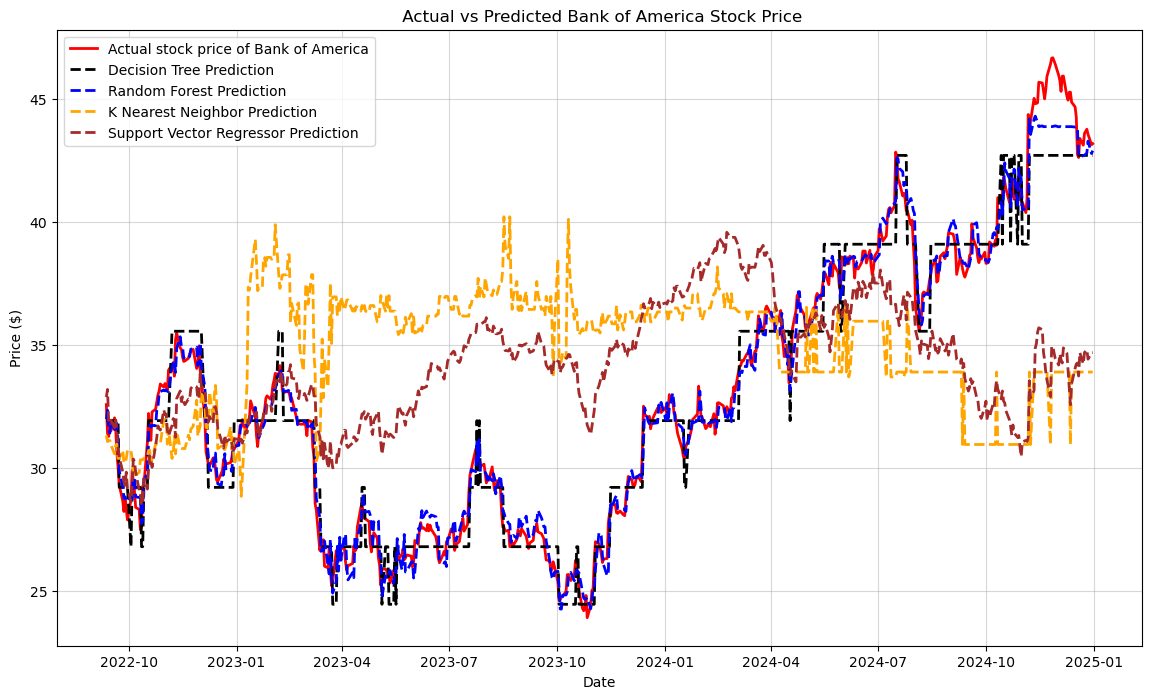

In [26]:
#  f) Visualization 
# Plot figure => figure size
plt.figure(figsize =(14,8))

# Plot Actual Value and Predicted Value  
plt.plot(Y_test.index, Y_test, label = 'Actual stock price of Bank of America', linewidth =2, color='red')
plt.plot(Y_test.index, dt_pred, label = 'Decision Tree Prediction', linewidth =2, color='black', linestyle='--')
plt.plot(Y_test.index, rf_pred, label = "Random Forest Prediction", linewidth =2, color='blue', linestyle='--')
plt.plot(Y_test.index, knn_pred, label = "K Nearest Neighbor Prediction", linewidth=2, color='orange', linestyle='--')
plt.plot(Y_test.index, svr_pred, label = "Support Vector Regressor Prediction", linewidth=2, color='brown', linestyle='--')

# Highlight title, xlabel, and ylabel
plt.title(" Actual vs Predicted Bank of America Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [27]:
#  important features
importance =dt_model.feature_importances_
features_name = X_train.columns

df_features= pd.DataFrame({'Feature': features_name, 'Importance': importance})
df_features = df_features.sort_values(by= 'Importance', ascending= False)
df_features

,Feature,Importance
1,BAC(t-1),1.0
0,JPM(t-1),0.0
2,MS(t-1),0.0
3,C(t-1),0.0
4,WFC(t-1),0.0
5,SPY(t-1),0.0
6,VIX(t-1),0.0
7,^TNX(t-1),0.0
8,GC=F(t-1),0.0
9,DX-Y.NYB(t-1),0.0


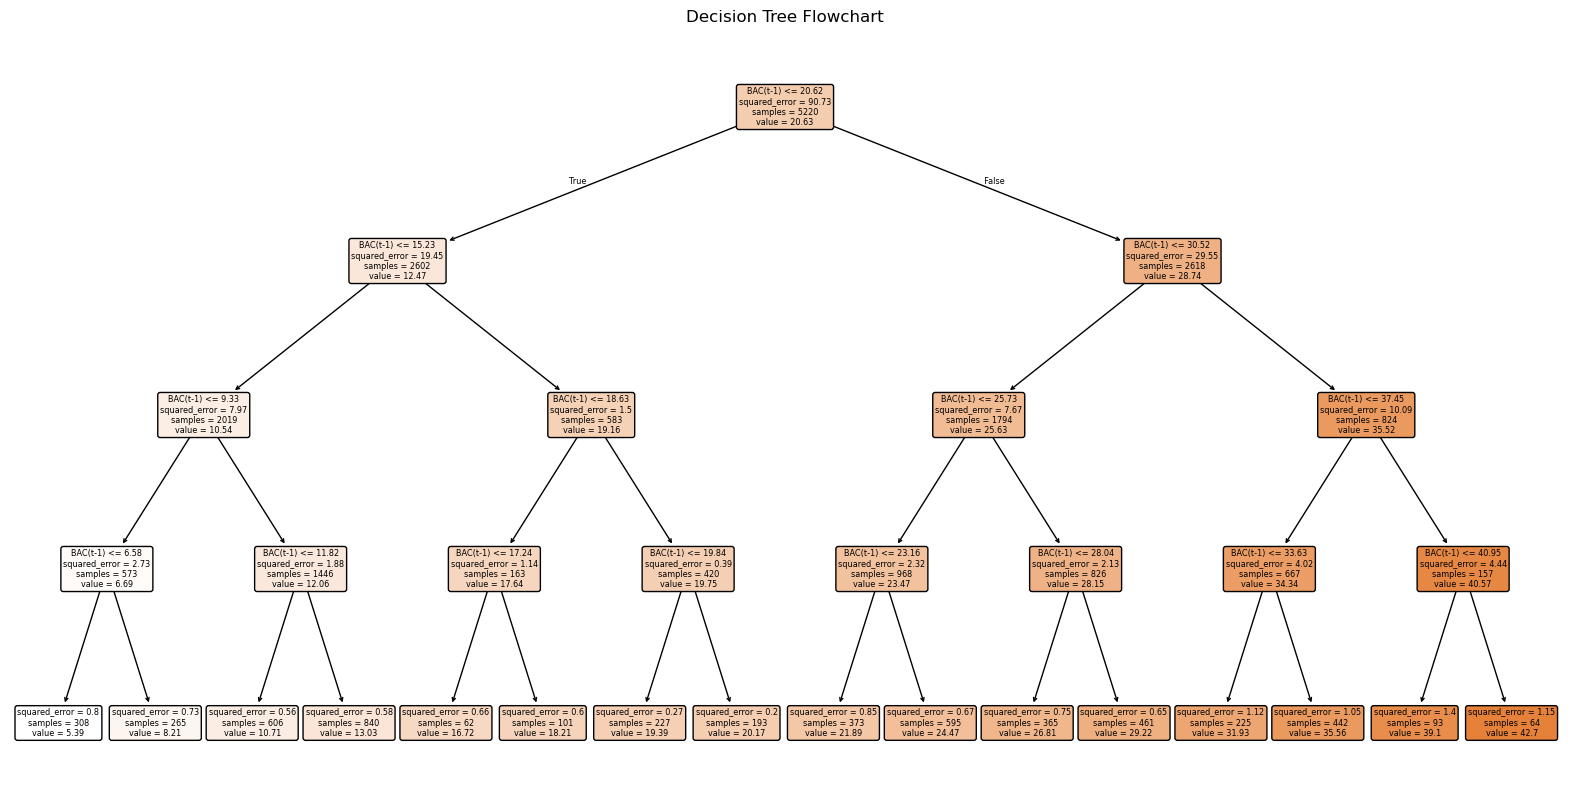

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names = X.columns, filled= True, rounded= True, precision=2)
plt.title("Decision Tree Flowchart")
plt.show()